In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# Read Train and Test dataset
data_train = pd.read_csv("data/KDDTrain+.txt")
data_test = pd.read_csv("data/KDDTest+.txt")

In [3]:
# duration: This feature represents the time duration (in seconds) of the connection.
# protocol_type: Indicates the protocol type of the network connection (e.g., TCP, UDP, ICMP).
# service: Represents the type of service on the destination machine (e.g., http, smtp, ftp).
# flag: This feature denotes the status of the connection (e.g., S0, SF, REJ).
# src_bytes: The number of data bytes sent by the source to the destination.
# dst_bytes: The number of data bytes sent by the destination to the source.
# land: A binary feature that indicates whether the connection is from/to the same host/port (1) or not (0).
# wrong_fragment: Represents the number of "wrong" fragments in the connection.
# urgent: Indicates the number of urgent packets in the connection.
# hot: Denotes the number of "hot" indicators for the connection.
# num_failed_logins: The count of failed login attempts.
# logged_in: A binary feature indicating whether the user is logged in (1) or not (0).
# num_compromised: Represents the number of compromised conditions.
# root_shell: A binary feature indicating whether root shell is obtained (1) or not (0).
# su_attempted: Denotes the number of "su" root attempts made.
# num_root: The count of root accesses.
# num_file_creations: Represents the number of file creation operations.
# num_shells: The number of shell prompts.
# num_access_files: The count of access files.
# num_outbound_cmds: The number of outbound commands in an ftp session.
# is_host_login: A binary feature indicating whether the login belongs to the host (1) or not (0).
# is_guest_login: A binary feature indicating whether the login is a guest login (1) or not (0).
# count: The count of connections to the same host as the current connection in the past two seconds.
# srv_count: The count of connections to the same service as the current connection in the past two seconds.
# serror_rate: The percentage of connections with "SYN" errors.
# srv_serror_rate: The percentage of connections with "SYN" errors to the same service.
# rerror_rate: The percentage of connections with "REJ" errors.
# srv_rerror_rate: The percentage of connections with "REJ" errors to the same service.
# same_srv_rate: The percentage of connections to the same service.
# diff_srv_rate: The percentage of connections to different services.
# srv_diff_host_rate: The percentage of connections to different hosts for the same service.
# dst_host_count: The number of connections from the same host to the destination host.
# dst_host_srv_count: The number of connections to the same service from the destination host.
# dst_host_same_srv_rate: The percentage of connections to the same service from the destination host.
# dst_host_diff_srv_rate: The percentage of connections to different services from the destination host.
# dst_host_same_src_port_rate: The percentage of connections to the same source port from the destination host.
# dst_host_srv_diff_host_rate: The percentage of connections to different hosts from the destination host for the same service.
# dst_host_serror_rate: The percentage of connections with "SYN" errors to the destination host.
# dst_host_srv_serror_rate: The percentage of connections with "SYN" errors to the same service from the destination host.
# dst_host_rerror_rate: The percentage of connections with "REJ" errors to the destination host.
# dst_host_srv_rerror_rate: The percentage of connections with "REJ" errors to the same service from the destination host.

In [4]:
# Get columns name for data
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'outcome'
,'level'])

In [5]:
# Assign name for columns
data_train.columns = columns
data_test.columns  = columns

In [6]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
print("Train size",data_train.shape)
print("Test size",data_test.shape)

Train size (125972, 43)
Test size (22543, 43)


In [8]:
# Get the distribution of the labels
labels = dict(data_train["outcome"].value_counts())
print(labels)

{'normal': 67342, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2}


In [9]:
# Get the distribution of the labels
test_labels = dict(data_test["outcome"].value_counts())
print(test_labels)

{'normal': 9711, 'neptune': 4656, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'nmap': 73, 'pod': 41, 'buffer_overflow': 20, 'multihop': 18, 'named': 17, 'ps': 15, 'sendmail': 14, 'rootkit': 13, 'xterm': 13, 'teardrop': 12, 'xlock': 9, 'land': 7, 'xsnoop': 4, 'ftp_write': 3, 'worm': 2, 'loadmodule': 2, 'perl': 2, 'sqlattack': 2, 'udpstorm': 2, 'phf': 2, 'imap': 1}


In [10]:
in_train_not_test=[]
for key in labels:
    if key not in test_labels:
        in_train_not_test.append(key)
print("Labels in train but not in test data: ",in_train_not_test)

in_test_not_train=[]
for key in test_labels:
    if key not in labels:
        in_test_not_train.append(key)
        
print("Labels in test but not in train data: ",in_test_not_train)

Labels in train but not in test data:  ['warezclient', 'spy']
Labels in test but not in train data:  ['mscan', 'apache2', 'processtable', 'snmpguess', 'saint', 'mailbomb', 'snmpgetattack', 'httptunnel', 'named', 'ps', 'sendmail', 'xterm', 'xlock', 'xsnoop', 'worm', 'sqlattack', 'udpstorm']


In [11]:
#Count of Labels in test but not in train data 
data_test[data_test['outcome'].isin(in_test_not_train)]['outcome'].value_counts()

mscan            996
apache2          737
processtable     685
snmpguess        331
saint            319
mailbomb         293
snmpgetattack    178
httptunnel       133
named             17
ps                15
sendmail          14
xterm             13
xlock              9
xsnoop             4
worm               2
sqlattack          2
udpstorm           2
Name: outcome, dtype: int64

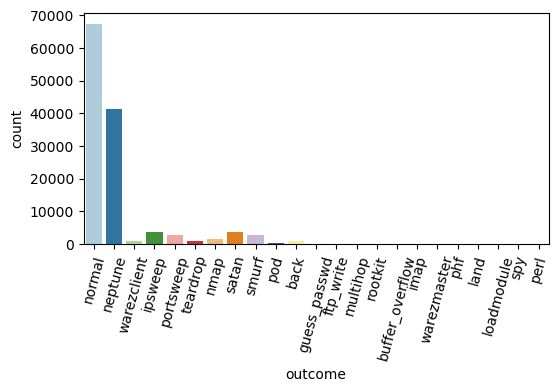

In [12]:
plt.figure(figsize=(6, 3))
sns.countplot(x='outcome',data=data_train,palette='Paired')
plt.xticks(rotation=75)
plt.show()

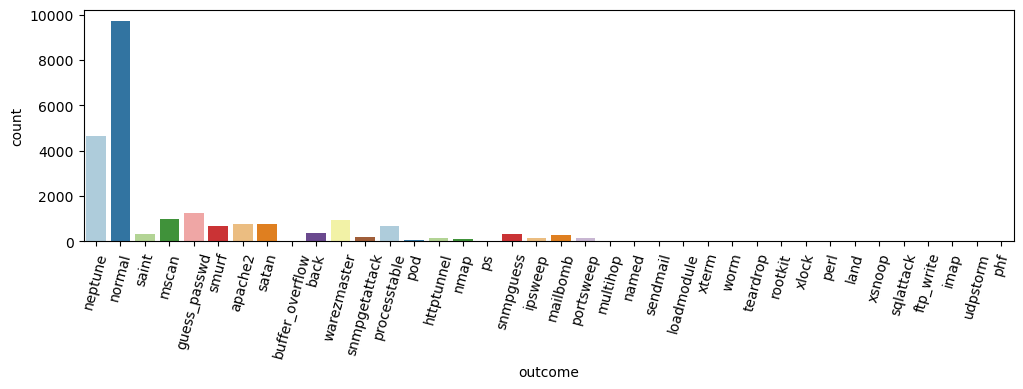

In [13]:
plt.figure(figsize=(12, 3))
sns.countplot(x='outcome',data=data_test,palette='Paired')
plt.xticks(rotation=75)
plt.show()

## Label encoding and encoding Categorical features

In [14]:
data_train["binaryoutcome"]=data_train.outcome.map(lambda a: "normal" if a == 'normal' else "abnormal")
data_test["binaryoutcome"]=data_test.outcome.map(lambda a: "normal" if a == 'normal' else "abnormal")


In [15]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,binaryoutcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,abnormal
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,abnormal


In [16]:
train_encoded = data_train.drop('outcome', axis=1)
test_encoded = data_test.drop('outcome', axis=1)

# Perform label encoding on categorical features
categorical_features = train_encoded.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
encode_map = {}

for feature in categorical_features:
    train_encoded[feature] = encoder.fit_transform(train_encoded[feature])
    test_encoded[feature] = encoder.transform(test_encoded[feature])
    le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    encode_map[feature] = le_name_mapping
    print(le_name_mapping)

{'icmp': 0, 'tcp': 1, 'udp': 2}
{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois': 69}
{'OTH': 0, 'REJ':

In [17]:
print("\n".join("{}\t{}".format(k, v) for k, v in encode_map.items()))

protocol_type	{'icmp': 0, 'tcp': 1, 'udp': 2}
service	{'IRC': 0, 'X11': 1, 'Z39_50': 2, 'aol': 3, 'auth': 4, 'bgp': 5, 'courier': 6, 'csnet_ns': 7, 'ctf': 8, 'daytime': 9, 'discard': 10, 'domain': 11, 'domain_u': 12, 'echo': 13, 'eco_i': 14, 'ecr_i': 15, 'efs': 16, 'exec': 17, 'finger': 18, 'ftp': 19, 'ftp_data': 20, 'gopher': 21, 'harvest': 22, 'hostnames': 23, 'http': 24, 'http_2784': 25, 'http_443': 26, 'http_8001': 27, 'imap4': 28, 'iso_tsap': 29, 'klogin': 30, 'kshell': 31, 'ldap': 32, 'link': 33, 'login': 34, 'mtp': 35, 'name': 36, 'netbios_dgm': 37, 'netbios_ns': 38, 'netbios_ssn': 39, 'netstat': 40, 'nnsp': 41, 'nntp': 42, 'ntp_u': 43, 'other': 44, 'pm_dump': 45, 'pop_2': 46, 'pop_3': 47, 'printer': 48, 'private': 49, 'red_i': 50, 'remote_job': 51, 'rje': 52, 'shell': 53, 'smtp': 54, 'sql_net': 55, 'ssh': 56, 'sunrpc': 57, 'supdup': 58, 'systat': 59, 'telnet': 60, 'tftp_u': 61, 'tim_i': 62, 'time': 63, 'urh_i': 64, 'urp_i': 65, 'uucp': 66, 'uucp_path': 67, 'vmnet': 68, 'whois':

In [18]:
train_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,0
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,1
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,0


In [19]:
test_encoded.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
0,0,1,49,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,21,0
1,2,1,20,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,21,1
2,0,0,14,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,15,0
3,1,1,60,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,11,0
4,0,1,24,9,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,21,1


In [21]:
train_encoded.to_csv("data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_encoded.to_csv("data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

## Training without any feature selection methods

In [21]:
xtrain = train_encoded.drop('binaryoutcome', axis=1).values
ytrain = train_encoded[['binaryoutcome']].values.ravel()
xtest = test_encoded.drop('binaryoutcome', axis=1).values
ytest = test_encoded[['binaryoutcome']].values.ravel()

In [22]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.transform(xtest)

In [23]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='newton-cholesky')

# Support Vector Machines
from sklearn.svm import LinearSVC,SVC
models['Support Vector Machines linear'] = LinearSVC(dual=False)
models['Support Vector Machines polynomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [24]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

train_accuracy,test_accuracy, precision, recall,train_time, predict_time = {}, {},{}, {}, {} , {}

for key in models.keys():
    
    print("Training ",key)
    
    start = time.time()
    # Fit the classifier
    models[key].fit(xtrain, ytrain)
    stop = time.time()
    train_time_taken = stop-start
    
    train_predictions = models[key].predict(xtrain)
    
    # Make predictions
    start = time.time()
    test_predictions = models[key].predict(xtest)
    stop = time.time()
    predict_time_taken = stop-start
    
    # Calculate metrics
    train_accuracy[key] = accuracy_score(train_predictions, ytrain)
    test_accuracy[key] = accuracy_score(test_predictions, ytest)
    precision[key] = precision_score(test_predictions, ytest)
    recall[key] = recall_score(test_predictions, ytest)
    train_time[key] = train_time_taken
    predict_time[key] = predict_time_taken

Training  Logistic Regression
Training  Support Vector Machines linear
Training  Support Vector Machines polynomial
Training  Support Vector Machines RBf
Training  Decision Trees
Training  Random Forest
Training  Naive Bayes
Training  K-Nearest Neighbor


In [25]:
df_model = pd.DataFrame(index=models.keys(), columns=['Train Accuracy','Test Accuracy', 'Precision', 'Recall','Training Time','Predicting Time'])
df_model['Train Accuracy'] = train_accuracy.values()
df_model['Test Accuracy'] = test_accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['Training Time'] = train_time.values()
df_model['Predicting Time'] = predict_time.values()

In [26]:
df_model

,Train Accuracy,Test Accuracy,Precision,Recall,Training Time,Predicting Time
Logistic Regression,0.978233,0.842612,0.924930,0.761122,0.393585,0.001264
Support Vector Machines linear,0.977368,0.846782,0.925445,0.767005,14.078133,0.000589
Support Vector Machines polynomial,0.997484,0.840483,0.963752,0.742601,100.015510,1.071633
Support Vector Machines RBf,0.999381,0.858227,0.976213,0.761752,6.104260,1.270920
Decision Trees,0.978130,0.822783,0.963341,0.719948,0.135003,0.001301
Random Forest,1.000000,0.810185,0.972608,0.701813,4.674561,0.093463
Naive Bayes,0.898970,0.804063,0.911956,0.713158,0.031798,0.004581
K-Nearest Neighbor,0.998047,0.814044,0.966121,0.708343,0.009590,2.191819


## Performing feature selection using pearson correlation

In [52]:
correlations = train_encoded.corr()[['binaryoutcome']]

In [53]:
correlations

,binaryoutcome
duration,-0.048785
protocol_type,0.281357
service,-0.276545
flag,0.647071
src_bytes,-0.005921
dst_bytes,-0.004118
land,-0.007191
wrong_fragment,-0.095905
urgent,0.002787
hot,0.013084


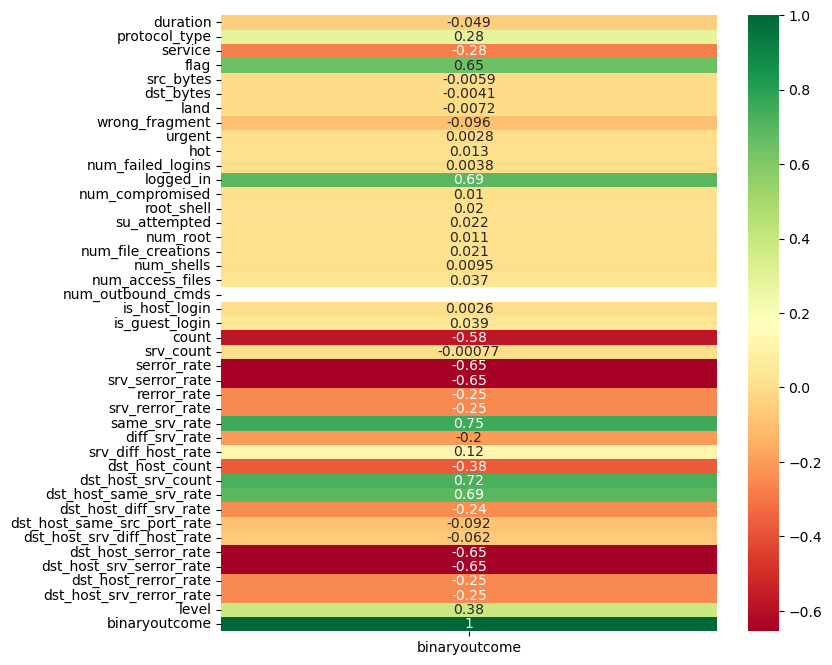

In [54]:
plt.figure(figsize=(8,8))
sns.heatmap(correlations,annot=True,cmap='RdYlGn')
plt.show()

In [56]:
threshold = 0.5
selected_features_corr = correlations[(correlations['binaryoutcome'] > threshold) | (correlations['binaryoutcome'] < -threshold)].index.tolist()
selected_features_corr.remove('binaryoutcome')

In [57]:
# Output the selected features
print("Selected features with correlation greater than 0.5 or less than -0.5:")
print(selected_features_corr)

Selected features with correlation greater than 0.5 or less than -0.5:
['flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


In [58]:
print("Number of selected features : ",len(selected_features_corr))

Number of selected features :  10


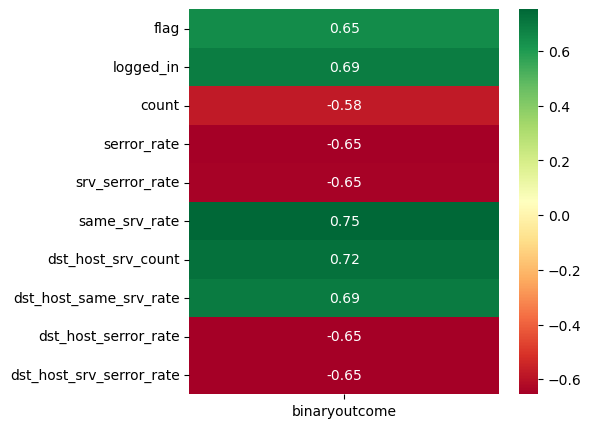

In [59]:
plt.figure(figsize=(5,5))
sns.heatmap(correlations.loc[selected_features_corr],annot=True,cmap='RdYlGn')
plt.show()

### Training with selected feature (Pearson correlation)

In [83]:
xtrain = train_encoded[selected_features_corr].values
xtest = test_encoded[selected_features_corr].values

ytrain = train_encoded[['binaryoutcome']].values.ravel()
ytest = test_encoded[['binaryoutcome']].values.ravel()

In [84]:
xtrain

array([[9.00e+00, 0.00e+00, 1.30e+01, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+00, 0.00e+00, 1.23e+02, ..., 1.00e-01, 1.00e+00, 1.00e+00],
       [9.00e+00, 1.00e+00, 5.00e+00, ..., 1.00e+00, 3.00e-02, 1.00e-02],
       ...,
       [9.00e+00, 1.00e+00, 1.00e+00, ..., 1.20e-01, 7.20e-01, 0.00e+00],
       [5.00e+00, 0.00e+00, 1.44e+02, ..., 3.00e-02, 1.00e+00, 1.00e+00],
       [9.00e+00, 1.00e+00, 1.00e+00, ..., 3.00e-01, 0.00e+00, 0.00e+00]])

In [85]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.transform(xtest)

In [86]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='newton-cholesky')

# Support Vector Machines
from sklearn.svm import LinearSVC,SVC
models['Support Vector Machines linear'] = LinearSVC(dual=False)
models['Support Vector Machines polynomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [87]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

train_accuracy,test_accuracy, precision, recall,train_time, predict_time = {}, {},{}, {}, {} , {}

for key in models.keys():
    
    print("Training ",key)
    
    start = time.time()
    # Fit the classifier
    models[key].fit(xtrain, ytrain)
    stop = time.time()
    train_time_taken = stop-start
    
    train_predictions = models[key].predict(xtrain)
    
    # Make predictions
    start = time.time()
    test_predictions = models[key].predict(xtest)
    stop = time.time()
    predict_time_taken = stop-start
    
    # Calculate metrics
    train_accuracy[key] = accuracy_score(train_predictions, ytrain)
    test_accuracy[key] = accuracy_score(test_predictions, ytest)
    precision[key] = precision_score(test_predictions, ytest)
    recall[key] = recall_score(test_predictions, ytest)
    train_time[key] = train_time_taken
    predict_time[key] = predict_time_taken

Training  Logistic Regression
Training  Support Vector Machines linear
Training  Support Vector Machines polynomial
Training  Support Vector Machines RBf
Training  Decision Trees
Training  Random Forest
Training  Naive Bayes
Training  K-Nearest Neighbor


In [88]:
df_model2 = pd.DataFrame(index=models.keys(), columns=['Train Accuracy','Test Accuracy', 'Precision', 'Recall','Training Time','Predicting Time'])
df_model2['Train Accuracy'] = train_accuracy.values()
df_model2['Test Accuracy'] = test_accuracy.values()
df_model2['Precision'] = precision.values()
df_model2['Recall'] = recall.values()
df_model2['Training Time'] = train_time.values()
df_model2['Predicting Time'] = predict_time.values()

In [89]:
df_model2

,Train Accuracy,Test Accuracy,Precision,Recall,Training Time,Predicting Time
Logistic Regression,0.916251,0.750211,0.921223,0.647698,0.142796,0.000213
Support Vector Machines linear,0.918744,0.741028,0.925239,0.637370,0.148079,0.000381
Support Vector Machines polynomial,0.951815,0.755445,0.926063,0.652234,34.114851,3.205191
Support Vector Machines RBf,0.959086,0.735217,0.924622,0.631612,58.669365,6.928584
Decision Trees,0.904042,0.780819,0.903306,0.686707,0.046689,0.000689
Random Forest,0.983266,0.726833,0.914221,0.625079,3.496058,0.161929
Naive Bayes,0.890285,0.740496,0.941510,0.633830,0.011453,0.001017
K-Nearest Neighbor,0.970589,0.767999,0.915251,0.668522,0.037632,1.569286


## Feature selection using mutual information

In [90]:
xtrain = train_encoded.drop('binaryoutcome', axis=1)
ytrain = train_encoded[['binaryoutcome']]
xtest = test_encoded.drop('binaryoutcome', axis=1)
ytest = test_encoded[['binaryoutcome']]

In [91]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(xtrain, ytrain)
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

/Users/bindu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


src_bytes                      0.567409
service                        0.467416
dst_bytes                      0.439810
flag                           0.367976
same_srv_rate                  0.367161
diff_srv_rate                  0.359448
dst_host_srv_count             0.336200
dst_host_same_srv_rate         0.311860
logged_in                      0.291165
dst_host_diff_srv_rate         0.284916
dst_host_serror_rate           0.284774
dst_host_srv_serror_rate       0.281389
serror_rate                    0.278804
srv_serror_rate                0.268581
count                          0.264390
dst_host_srv_diff_host_rate    0.187046
level                          0.152343
dst_host_count                 0.143395
dst_host_same_src_port_rate    0.131865
srv_diff_host_rate             0.097574
srv_count                      0.064327
dst_host_srv_rerror_rate       0.062461
protocol_type                  0.055946
rerror_rate                    0.038706
srv_rerror_rate                0.036008


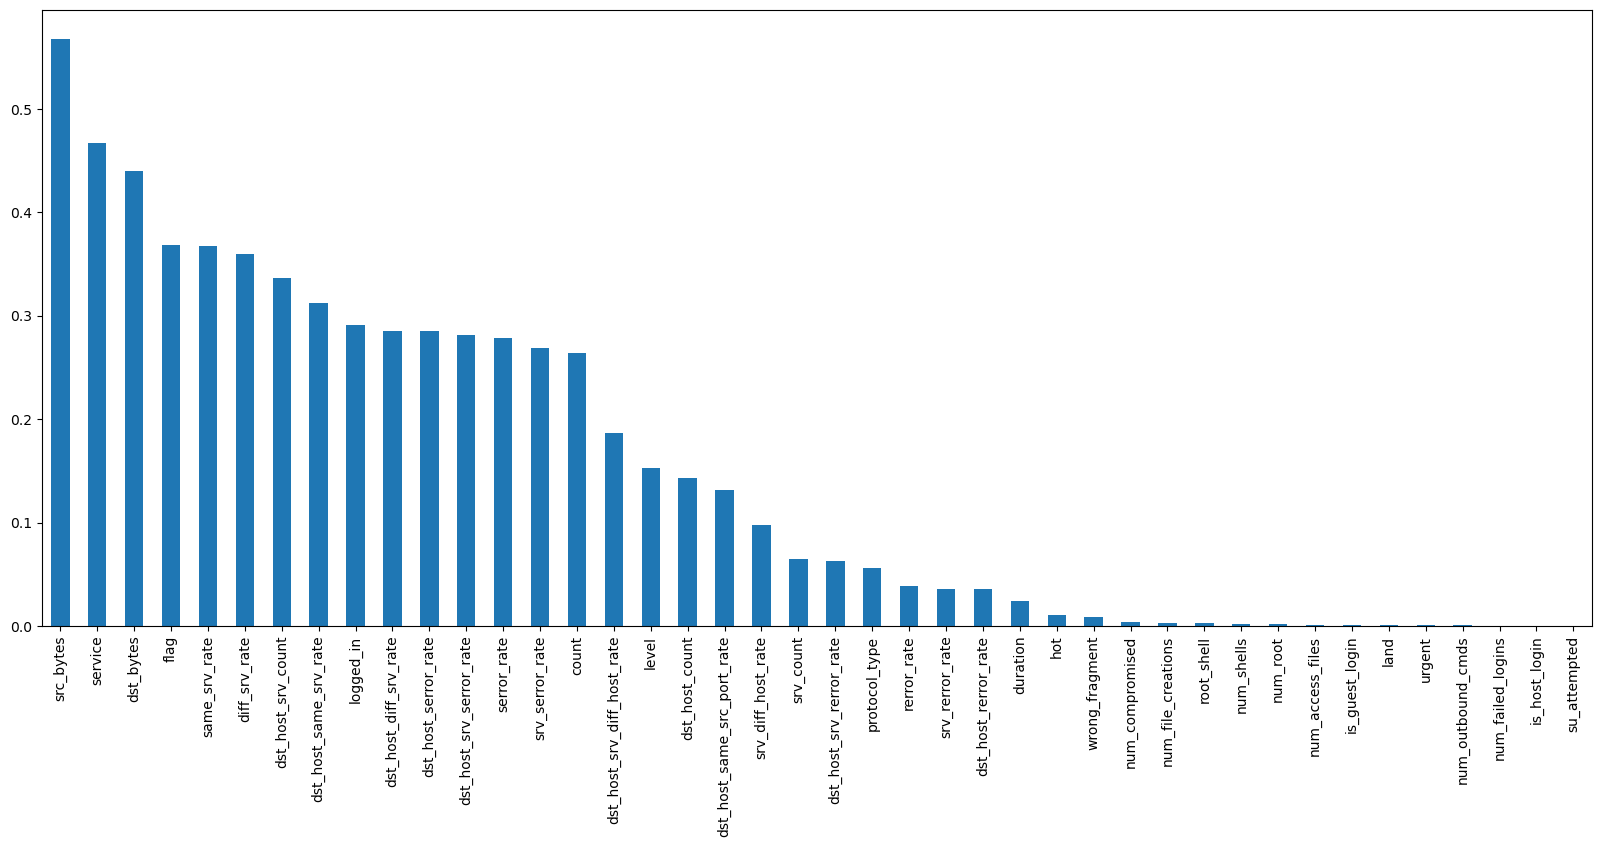

In [92]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8));

In [93]:
# I will choose 10 features to select
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(xtrain, ytrain)
xtrain.columns[sel_five_cols.get_support()]

/Users/bindu/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate'],
      dtype='object')

In [94]:
selected_features_mi = ['service', 'flag', 'src_bytes', 'dst_bytes', 'logged_in',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate']

In [95]:
print("MI selected features : ",sorted(selected_features_mi))

MI selected features :  ['diff_srv_rate', 'dst_bytes', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'flag', 'logged_in', 'same_srv_rate', 'service', 'src_bytes']


In [96]:
print("Correlation selected features : ",sorted(selected_features_corr))

Correlation selected features :  ['count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'flag', 'logged_in', 'same_srv_rate', 'serror_rate', 'srv_serror_rate']


### Training with selected features (Mutual Information)

In [97]:
xtrain = train_encoded[selected_features_mi].values
xtest = test_encoded[selected_features_mi].values

ytrain = train_encoded[['binaryoutcome']].values.ravel()
ytest = test_encoded[['binaryoutcome']].values.ravel()

In [98]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtest= scaler.transform(xtest)

In [99]:
# we'll initialize each model and store it by name in a dictionary
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(solver='newton-cholesky')

# Support Vector Machines
from sklearn.svm import LinearSVC,SVC
models['Support Vector Machines linear'] = LinearSVC(dual=False)
models['Support Vector Machines polynomial'] = SVC(kernel='poly')
models['Support Vector Machines RBf'] =  SVC(C=100.0)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(max_depth=3)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(n_neighbors=20)

In [100]:
# we'll loop over each one, train it by calling .fit(), make predictions, calculate metrics, and store each result in a dictionary.

from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

train_accuracy,test_accuracy, precision, recall,train_time, predict_time = {}, {},{}, {}, {} , {}

for key in models.keys():
    
    print("Training ",key)
    
    start = time.time()
    # Fit the classifier
    models[key].fit(xtrain, ytrain)
    stop = time.time()
    train_time_taken = stop-start
    
    train_predictions = models[key].predict(xtrain)
    
    # Make predictions
    start = time.time()
    test_predictions = models[key].predict(xtest)
    stop = time.time()
    predict_time_taken = stop-start
    
    # Calculate metrics
    train_accuracy[key] = accuracy_score(train_predictions, ytrain)
    test_accuracy[key] = accuracy_score(test_predictions, ytest)
    precision[key] = precision_score(test_predictions, ytest)
    recall[key] = recall_score(test_predictions, ytest)
    train_time[key] = train_time_taken
    predict_time[key] = predict_time_taken

Training  Logistic Regression
Training  Support Vector Machines linear
Training  Support Vector Machines polynomial
Training  Support Vector Machines RBf
Training  Decision Trees
Training  Random Forest
Training  Naive Bayes
Training  K-Nearest Neighbor


In [101]:
df_model3 = pd.DataFrame(index=models.keys(), columns=['Train Accuracy','Test Accuracy', 'Precision', 'Recall','Training Time','Predicting Time'])
df_model3['Train Accuracy'] = train_accuracy.values()
df_model3['Test Accuracy'] = test_accuracy.values()
df_model3['Precision'] = precision.values()
df_model3['Recall'] = recall.values()
df_model3['Training Time'] = train_time.values()
df_model3['Predicting Time'] = predict_time.values()

In [102]:
df_model3

,Train Accuracy,Test Accuracy,Precision,Recall,Training Time,Predicting Time
Logistic Regression,0.903518,0.738633,0.945011,0.631373,0.166688,0.000488
Support Vector Machines linear,0.907225,0.744178,0.956544,0.634755,0.270459,0.000348
Support Vector Machines polynomial,0.942821,0.770527,0.972299,0.658163,39.932727,3.821586
Support Vector Machines RBf,0.974494,0.825312,0.965709,0.722329,71.055567,5.576396
Decision Trees,0.962809,0.777980,0.957780,0.669329,0.059376,0.000666
Random Forest,0.999905,0.781218,0.965297,0.671057,3.875440,0.093318
Naive Bayes,0.876655,0.732112,0.976007,0.620126,0.012077,0.002371
K-Nearest Neighbor,0.985989,0.810983,0.971888,0.702964,0.038264,1.435103
